___
# Ciência dos Dados - PROJETO 1

## Kevin Liu




## Estudo sobre  aparelhos que  as pessoas acessam a internet 
  ### Qual é o aparelho se utiliza mais para acessar a internet em cada faixa de renda ?Isso muda ao longo dos anos ?

___
## Introdução



Eu pretendo analisar quais aparelhos pessoas de diferentes rendas,para fins de analise estão dividas em faixas de renda, utilizam para acessar a internet e se há alguma diferença ao longo dos anos da Pesquisa nas unidades Federativas Santa Catarina e Rio Grande do Sul


___
## Análise e Resultados

 ## Dados do ano 2013:tabela

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/kevinliu8/Documents/Ciencias-dos-Dados/Projeto 1 


In [3]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2013.csv',sep=',')
#dados.head()
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
dadosSc_2013 = dados[dados.V4621!=999999999999].loc[:,["V0101","UF","V02272","V02274","V02322","V02324","V02424","V02426","V02323","V02325","V02327","V4621"]] # SANTA Catarina # delimitando variaveis na coluna
#dadosSc.to_csv("resumo.csv")
dadosSc_2013.columns =["Ano","UF","Tv_assinatura","TV_antena_parabolica","Domicilio_com_internet","celular_com_internet","Uso_de_3G_ou_4G","internet_banda_larga","microcomputador","Tablet","outro_equipamento","Renda_mensal"]
dadosSc_2013 = dadosSc_2013[pd.notnull(dadosSc_2013.Renda_mensal)& pd.notnull(dadosSc_2013.Tv_assinatura)&pd.notnull(dadosSc_2013.TV_antena_parabolica)&pd.notnull(dadosSc_2013.Domicilio_com_internet)&pd.notnull(dadosSc_2013.Uso_de_3G_ou_4G)&pd.notnull(dadosSc_2013.internet_banda_larga)&pd.notnull(dadosSc_2013.microcomputador)&pd.notnull(dadosSc_2013.celular_com_internet)&pd.notnull(dadosSc_2013.Tablet)&pd.notnull(dadosSc_2013.outro_equipamento)]
# muita pouca gente que acessa com outro equipamento

#Transformando em categoria 
dadosSc_2013.UF = dadosSc_2013.UF.astype("category")
dadosSc_2013.Tv_assinatura= dadosSc_2013.Tv_assinatura.astype("category") 
dadosSc_2013.TV_antena_parabolica = dadosSc_2013.TV_antena_parabolica.astype("category") 
dadosSc_2013.Domicilio_com_internet = dadosSc_2013.Domicilio_com_internet.astype("category") 
dadosSc_2013.celular_com_internet=dadosSc_2013.celular_com_internet.astype("category")
dadosSc_2013.Uso_de_3G_ou_4G=dadosSc_2013.Uso_de_3G_ou_4G.astype("category")
dadosSc_2013.internet_banda_larga=dadosSc_2013.internet_banda_larga.astype("category")
dadosSc_2013.microcomputador=dadosSc_2013.microcomputador.astype("category")
dadosSc_2013.Tablet=dadosSc_2013.Tablet.astype("category")
dadosSc_2013.outro_equipamento=dadosSc_2013.outro_equipamento.astype("category")


# Trocando os valores representativos(numeros) pelo seu significado
dadosSc_2013.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")

dadosSc_2013.Tv_assinatura.cat.categories =(["Sim","Não"])
dadosSc_2013.TV_antena_parabolica.cat.categories = (["Sim","Não","Não sabe"])
dadosSc_2013.Domicilio_com_internet.cat.categories = (["Sim"])
dadosSc_2013.celular_com_internet.cat.categories = (["Sim ","Não"])
dadosSc_2013.Uso_de_3G_ou_4G.cat.categories = (["Sim ","Não"])
dadosSc_2013.internet_banda_larga.cat.categories = (["Sim ","Não"])
dadosSc_2013.microcomputador.cat.categories = (["Sim ","Não"])
dadosSc_2013.Tablet.cat.categories = (["Sim ","Não"])
dadosSc_2013.outro_equipamento.cat.categories = (["Sim ","Não"])

dadosSc_2013 = dadosSc_2013[(dadosSc_2013.UF=="Santa Catarina")|(dadosSc_2013.UF== "Rio Grande do Sul")]

renda_baixa = dadosSc_2013[dadosSc_2013.Renda_mensal<=700] 
renda_media = dadosSc_2013[(dadosSc_2013.Renda_mensal>700)&(dadosSc_2013.Renda_mensal<=2500)]
renda_alta =dadosSc_2013[dadosSc_2013.Renda_mensal>2500]
#dadosSc_2013.head()


 # Retirando usuarios nulos 
dadosSc_2013.to_csv("resumo.csv")

dadosSc_2013






,Ano,UF,Tv_assinatura,TV_antena_parabolica,Domicilio_com_internet,celular_com_internet,Uso_de_3G_ou_4G,internet_banda_larga,microcomputador,Tablet,outro_equipamento,Renda_mensal
116053,2013,Santa Catarina,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,1600.0
116054,2013,Santa Catarina,Não,Sim,Sim,Não,Não,Sim,Sim,Não,Não,700.0
116055,2013,Santa Catarina,Sim,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,3633.0
116057,2013,Santa Catarina,Não,Sim,Sim,Não,Não,Sim,Sim,Não,Não,1428.0
116058,2013,Santa Catarina,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,433.0
116060,2013,Santa Catarina,Não,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,1033.0
116061,2013,Santa Catarina,Sim,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,933.0
116062,2013,Santa Catarina,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,1095.0
116063,2013,Santa Catarina,Não,Sim,Sim,Não,Não,Sim,Sim,Não,Não,746.0
116064,2013,Santa Catarina,Não,Não,Sim,Não,Não,Sim,Sim,Não,Não,1200.0


## Dados do ano 2014: tabela

In [5]:
dados2 = pd.read_csv('DOM2014.csv',sep=',')

In [6]:
dadosSc_2014 = dados2[dados2.V4621!=999999999999].loc[:,["V0101","UF","V02322","V02324","V02424","V02426","V02323","V02325","V02327","V4621"]] # SANTA Catarina # delimitando variaveis na coluna
#dadosSc.to_csv("resumo.csv")
dadosSc_2014.columns =["Ano","UF","Domicilio_com_internet","celular_com_internet","Uso_de_3G_ou_4G","internet_banda_larga","microcomputador","Tablet","outro_equipamento","Renda_mensal"]
dadosSc_2014 = dadosSc_2014[pd.notnull(dadosSc_2014.Renda_mensal)&pd.notnull(dadosSc_2014.Domicilio_com_internet)&pd.notnull(dadosSc_2014.celular_com_internet)&pd.notnull(dadosSc_2014.Uso_de_3G_ou_4G)&pd.notnull(dadosSc_2014.internet_banda_larga)&pd.notnull(dadosSc_2014.microcomputador)&pd.notnull(dadosSc_2014.Tablet)&pd.notnull(dadosSc_2014.outro_equipamento)]
# muita pouca gente que acessa com outro equipamento

#Transformando em categoria 
dadosSc_2014.UF = dadosSc_2014.UF.astype("category")

dadosSc_2014.Domicilio_com_internet = dadosSc_2014.Domicilio_com_internet.astype("category") 
dadosSc_2014.celular_com_internet=dadosSc_2014.celular_com_internet.astype("category")
dadosSc_2014.Uso_de_3G_ou_4G=dadosSc_2014.Uso_de_3G_ou_4G.astype("category")
dadosSc_2014.internet_banda_larga=dadosSc_2014.internet_banda_larga.astype("category")
dadosSc_2014.microcomputador=dadosSc_2014.microcomputador.astype("category")
dadosSc_2014.Tablet=dadosSc_2014.Tablet.astype("category")
dadosSc_2014.outro_equipamento=dadosSc_2014.outro_equipamento.astype("category")


# Trocando os valores representativos(numeros) pelo seu significado
dadosSc_2014.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")


dadosSc_2014.Domicilio_com_internet.cat.categories = (["Sim"])
dadosSc_2014.celular_com_internet.cat.categories = (["Sim ","Não"])
dadosSc_2014.Uso_de_3G_ou_4G.cat.categories = (["Sim ","Não"])
dadosSc_2014.internet_banda_larga.cat.categories = (["Sim ","Não"])
dadosSc_2014.microcomputador.cat.categories = (["Sim ","Não"])
dadosSc_2014.Tablet.cat.categories = (["Sim ","Não"])
dadosSc_2014.outro_equipamento.cat.categories = (["Sim ","Não"])

dadosSc_2014 = dadosSc_2014[(dadosSc_2014.UF=="Santa Catarina")|(dadosSc_2014.UF== "Rio Grande do Sul")]
#dadosSc_2014.head()
renda_baixa_2014 = dadosSc_2014[dadosSc_2014.Renda_mensal<=700] 
renda_media_2014 = dadosSc_2014[(dadosSc_2014.Renda_mensal>700)&(dadosSc_2014.Renda_mensal<=2500)]
renda_alta_2014 =dadosSc_2014[dadosSc_2014.Renda_mensal>2500]

 # Retirando usuarios nulos 
dadosSc_2014.to_csv("resumo2014.csv")

dadosSc_2014.head()



,Ano,UF,Domicilio_com_internet,celular_com_internet,Uso_de_3G_ou_4G,internet_banda_larga,microcomputador,Tablet,outro_equipamento,Renda_mensal
118216,2014,Santa Catarina,Sim,Sim,Não,Sim,Sim,Não,Não,2400.0
118217,2014,Santa Catarina,Sim,Sim,Não,Sim,Sim,Não,Não,1100.0
118218,2014,Santa Catarina,Sim,Sim,Não,Sim,Sim,Não,Não,572.0
118221,2014,Santa Catarina,Sim,Sim,Sim,Sim,Sim,Não,Não,1566.0
118224,2014,Santa Catarina,Sim,Sim,Sim,Não,Sim,Não,Não,1749.0


## Dados do ano 2015 :tabela

In [7]:
dados3 = pd.read_csv('DOM2015.csv',sep=',')

In [20]:
dadosSc_2015 = dados3[dados3.V4621!=999999999999].loc[:,["V0101","UF","V02272","V02274","V02322","V02324","V02424","V02426","V02323","V02325","V02327","V4621"]] # SANTA Catarina # delimitando variaveis na coluna
#dadosSc.to_csv("resumo.csv")
dadosSc_2015.columns =["Ano","UF","Tv_assinatura","TV_antena_parabolica","Domicilio_com_internet","celular_com_internet","Uso_de_3G_ou_4G","internet_banda_larga","microcomputador","Tablet","outro_equipamento","Renda_mensal"]
dadosSc_2015 = dadosSc_2015[pd.notnull(dadosSc_2015.Renda_mensal)& pd.notnull(dadosSc_2015.Tv_assinatura)&pd.notnull(dadosSc_2015.TV_antena_parabolica)&pd.notnull(dadosSc_2015.celular_com_internet)&pd.notnull(dadosSc_2015.Domicilio_com_internet)&pd.notnull(dadosSc_2015.Uso_de_3G_ou_4G)&pd.notnull(dadosSc_2015.internet_banda_larga)&pd.notnull(dadosSc_2015.microcomputador)&pd.notnull(dadosSc_2015.Tablet)&pd.notnull(dadosSc_2015.outro_equipamento)]
# muita pouca gente que acessa com outro equipamento

#Transformando em categoria 
dadosSc_2015.UF = dadosSc_2015.UF.astype("category")
dadosSc_2015.Tv_assinatura= dadosSc_2015.Tv_assinatura.astype("category") 
dadosSc_2015.TV_antena_parabolica = dadosSc_2015.TV_antena_parabolica.astype("category") 
dadosSc_2015.Domicilio_com_internet = dadosSc_2015.Domicilio_com_internet.astype("category") 
dadosSc_2015.celular_com_internet=dadosSc_2015.celular_com_internet.astype("category")
dadosSc_2015.Uso_de_3G_ou_4G=dadosSc_2015.Uso_de_3G_ou_4G.astype("category")
dadosSc_2015.internet_banda_larga=dadosSc_2015.internet_banda_larga.astype("category")
dadosSc_2015.microcomputador=dadosSc_2015.microcomputador.astype("category")
dadosSc_2015.Tablet=dadosSc_2015.Tablet.astype("category")
dadosSc_2015.outro_equipamento=dadosSc_2015.outro_equipamento.astype("category")


# Trocando os valores representativos(numeros) pelo seu significado
dadosSc_2015.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")

dadosSc_2015.Tv_assinatura.cat.categories =(["Sim","Não"])
dadosSc_2015.TV_antena_parabolica.cat.categories = (["Sim","Não","Não sabe"])
dadosSc_2015.Domicilio_com_internet.cat.categories = (["Sim"])
dadosSc_2015.celular_com_internet.cat.categories = (["Sim","Não"])
dadosSc_2015.Uso_de_3G_ou_4G.cat.categories = (["Sim ","Não"])
dadosSc_2015.internet_banda_larga.cat.categories = (["Sim ","Não"])
dadosSc_2015.microcomputador.cat.categories = (["Sim ","Não"])
dadosSc_2015.Tablet.cat.categories = (["Sim ","Não"])
dadosSc_2015.outro_equipamento.cat.categories = (["Sim ","Não"])

dadosSc_2015 = dadosSc_2015[(dadosSc_2015.UF=="Santa Catarina")|(dadosSc_2015.UF== "Rio Grande do Sul")]
#dadosSc_2015.head()
renda_baixa_2015 = dadosSc_2015[dadosSc_2015.Renda_mensal<=700] 
renda_media_2015  = dadosSc_2015[(dadosSc_2015.Renda_mensal>700)&(dadosSc_2015.Renda_mensal<=2500)]
renda_alta_2015  =dadosSc_2015[dadosSc_2015.Renda_mensal>2500]

dadosSc_2015.to_csv("resumo.csv")

dadosSc_2015.head()


,Ano,UF,Tv_assinatura,TV_antena_parabolica,Domicilio_com_internet,celular_com_internet,Uso_de_3G_ou_4G,internet_banda_larga,microcomputador,Tablet,outro_equipamento,Renda_mensal
118087,2015,Santa Catarina,Não,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,333.0
118088,2015,Santa Catarina,Não,Sim,Sim,Sim,Sim,Não,Não,Sim,Não,1254.0
118090,2015,Santa Catarina,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Não,2000.0
118091,2015,Santa Catarina,Não,Sim,Sim,Sim,Sim,Não,Não,Não,Não,865.0
118092,2015,Santa Catarina,Não,Não,Sim,Sim,Sim,Sim,Sim,Não,Não,2160.0


## Gráfico de renda mensal das pessoas  nos estados Santa Catarina e Rio Grande do Sul


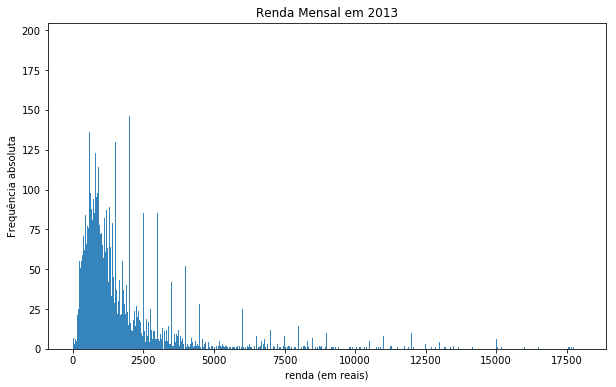

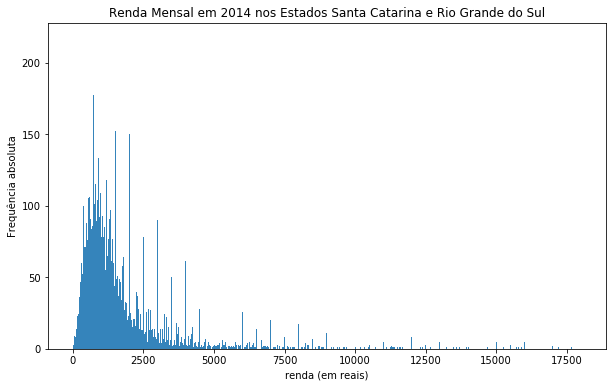

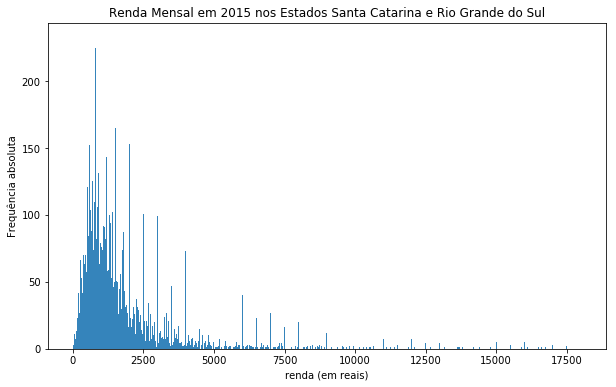

In [9]:
faixa= range(10,18000,25) # markdown explicar grafico vs pergunta
plot = dadosSc_2013.Renda_mensal.plot.hist(bins=faixa, figsize=(10, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.title("Renda Mensal em 2013")
plt.xlabel('renda (em reais)')
plt.show()

plot1 = dadosSc_2014.Renda_mensal.plot.hist(bins=faixa, figsize=(10, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.title("Renda Mensal em 2014 nos Estados Santa Catarina e Rio Grande do Sul")
plt.xlabel('renda (em reais)')
plt.show()
plot2 = dadosSc_2015.Renda_mensal.plot.hist(bins=faixa, figsize=(10, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.title("Renda Mensal em 2015 nos Estados Santa Catarina e Rio Grande do Sul")
plt.xlabel('renda (em reais)')

plt.show()

É possível com esse gráfico observar a distribuição e a concentração de renda nos dois Estados brasileiros,Sc e Rs.

## Graficos de Frequencia relativa  de 2013 sobre que aparelhos as pessoas utilizam para acessar a  internet

  nos Estados Santa Catarina e Rio Grande do Sul

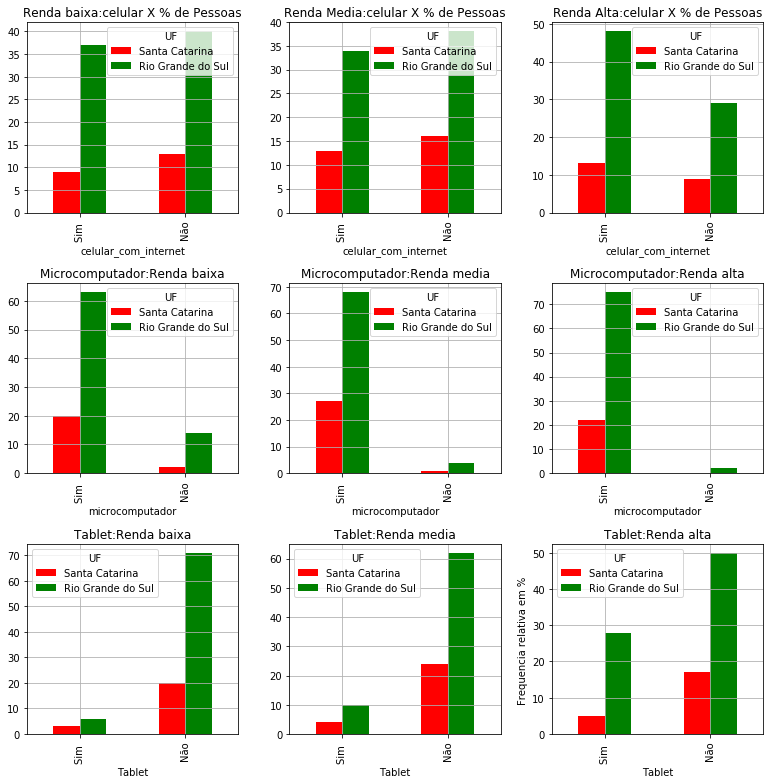

In [54]:

# Crosstab Renda e celular_com_internet
celular = pd.crosstab(renda_baixa.celular_com_internet,renda_baixa.UF)
celular = (celular/celular.sum().sum()*100).round(decimals=0)
celular_medio = pd.crosstab(renda_media.celular_com_internet,renda_media.UF)
celular_medio = (celular_medio/celular_medio.sum().sum()*100).round(decimals=0)
celular_alto = pd.crosstab(renda_alta.celular_com_internet,renda_alta.UF)
celular_alto =(celular_alto/celular_alto.sum().sum()*100).round(decimals=0)

# Crosstab Renda e  Microcomputador 
microcomputador = pd.crosstab(renda_baixa.microcomputador,renda_baixa.UF)
microcomputador = (microcomputador/microcomputador.sum().sum()*100).round(decimals=0)
microcomputador_medio = pd.crosstab(renda_media.microcomputador,renda_media.UF)
microcomputador_medio = (microcomputador_medio/microcomputador_medio.sum().sum()*100).round(decimals=0)
microcomputador_alto = pd.crosstab(renda_alta.microcomputador,renda_alta.UF)
microcomputador_alto = (microcomputador_alto/microcomputador_alto.sum().sum()*100).round(decimals=0)

# Tablet x renda
Tablet = pd.crosstab(renda_baixa.Tablet,renda_baixa.UF)
Tablet = (Tablet/Tablet.sum().sum()*100).round(decimals=0)
Tablet_medio = pd.crosstab(renda_media.Tablet,renda_media.UF)
Tablet_medio = (Tablet_medio/Tablet_medio.sum().sum()*100).round(decimals=0)
Tablet_alto = pd.crosstab(renda_alta.Tablet,renda_alta.UF)
Tablet_alto = (Tablet_alto/Tablet_alto.sum().sum()*100).round(decimals=0)


f,axes = plt.subplots(nrows=3,ncols=3)  

# Celular com internet renda baixa media e alta 
celular.plot(kind='bar',ax=axes[0,0],figsize=(10,7),color=('red','green'),grid=True); axes[0,0].set_title("Renda baixa:celular X % de Pessoas")
celular_medio.plot(kind="bar",ax=axes[0,1],color=('red','green'),figsize=(10,7),grid=True); axes[0,1].set_title("Renda Media:celular X % de Pessoas")
celular_alto.plot(kind="bar",ax=axes[0,2],color=('red','green'),figsize=(10,7),grid=True); axes[0,2].set_title("Renda Alta:celular X % de Pessoas")

# Microcomputador plotar grafico
microcomputador.plot(kind='bar',ax=axes[1,0],figsize=(10,8),color=('red','green'),grid=True); axes[1,0].set_title("Microcomputador:Renda baixa")
microcomputador_medio.plot(kind='bar',ax=axes[1,1],figsize=(10,8),color=('red','green'),grid=True); axes[1,1].set_title("Microcomputador:Renda media")
microcomputador_alto.plot(kind='bar',ax=axes[1,2],figsize=(10,8),grid=True,color=('red','green')); axes[1,2].set_title("Microcomputador:Renda alta")

# Tablet plota grafico
Tablet.plot(kind='bar',ax=axes[2,0],figsize=(10,8),color=('red','green'),grid=True); axes[2,0].set_title("Tablet:Renda baixa")
Tablet_medio.plot(kind='bar',ax=axes[2,1],figsize=(10,8),color=("red",'green'),grid=True); axes[2,1].set_title("Tablet:Renda media")
Tablet_alto.plot(kind='bar',ax=axes[2,2],figsize=(11,11),color=('red','green'),grid=True); axes[2,2].set_title("Tablet:Renda alta")
plt.ylabel("Frequencia relativa em % ")



plt.tight_layout()

### Analise dos graficos de 2013 sobre quais aparelhos as pessoas utilizam para acessar a internet
###### Faixa de renda baixa - até 700 reais  ;  Faixa de renda media- de 700 até 2500 reais    ; Faixa de renda alta - maior do que 2500 reais 
###### Podemos observar no ano de 2013 que a faixa de renda baixa  nos dois Estados utiliza predominantemente o microcomputador para acessar a internet com um total de aproximadamente  84% ,composta por 64% de  pessoas(RS) e 20% das pessoas(SC) valores relacionados a porcentagem total de pessoas entrevistados dos dois Estados junntos,ou seja 100% e RS+ SC. Ja os as pessoas que acessam a internet pelo celular são aproximadamente 45% delas(36%-RS e 9%-SC),nesse caso uma boa parte das pessoas utilizam a internet pelo celular nos dois Estados, porém podemos analisar que mais de 50% das pessoas não possuem ou acessam a internet pelo celular . O Tablet nessa faixa de renda não é muito utilizado para acessar a internet,com  aproximadamente 90% dos individuos não usam internet pelo Tablet.
###### A faixa de renda media possui como aparelho predominante o microcomputador com um total de aproximadamente 96% de pessoas da faixa de renda media dentre elas 68%(RS) e 28%(SC) . Já a porcentagem de  pessoas que utilizam o celular para acessar a internet é de aproximadamente 45% (RS- 33% e SC-12%). O Tablet é tambem o aparelho menos utilizado para acessar a internet nessa renda com aproximadamente 84% das pessoas não o utilizam .
###### A faixa de renda alta possui predominantemente como aparelho de acesso a internet o microcomputador com aproximadamente 94% dos individous dos Estados Sc e Rs nessa faixa de renda o utilizando dentre eles 22% (RS) E 72% (SC) . O celular é o segundo aparelho que as pessoas mais utilizam para acessar a internet com 62% das pessoas (48%-RS e 14%-SC) . O aparelho eletronico Tablet possui aproximadamente 67% (50%-RS e 17%-SC) de pessoas  que não o utilizam para acessar a internet.
###### Podemos concluir com esses dados de 2013 que os aparelhos eletrônicos mais utilizados e os menos utilizados mantem-se para todas as 3 faixas de renda que estariam organizados  em ordem de mais utilizado para o menos utilizado Microcomputador, celular e tablet .Além disso , tambem é possivel concluir que ao aumentar a faixa de renda ,a porcentagem de pessoas que utilizam aquele objeto aumenta em relação a faixa de renda salarial menor.

## Graficos de 2014 sobre que aparelhos as pessoas utilizam para acessar a  internet

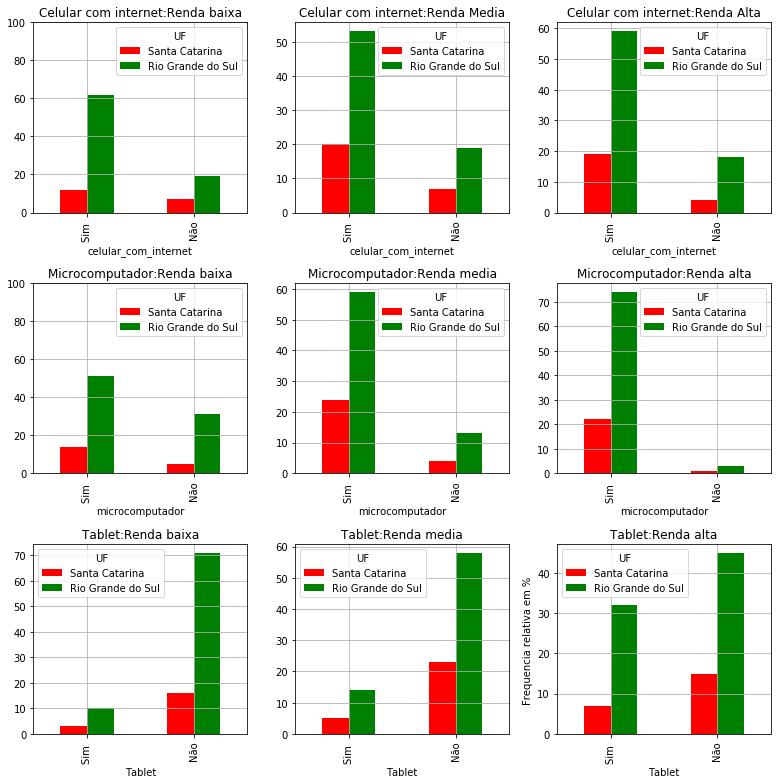

In [55]:
# Crosstab Renda e celular_com_internet
celular_2014 = pd.crosstab(renda_baixa_2014.celular_com_internet,renda_baixa_2014.UF)
celular_2014 = (celular_2014/celular_2014.sum().sum()*100).round(decimals=0)
celular_medio_2014 = pd.crosstab(renda_media_2014.celular_com_internet,renda_media_2014.UF)
celular_medio_2014 = (celular_medio_2014/celular_medio_2014.sum().sum()*100).round(decimals=0)
celular_alto_2014 = pd.crosstab(renda_alta_2014.celular_com_internet,renda_alta_2014.UF)
celular_alto_2014 =(celular_alto_2014/celular_alto_2014.sum().sum()*100).round(decimals=0)

# Crosstab Renda e  Microcomputador 
microcomputador_2014 = pd.crosstab(renda_baixa_2014.microcomputador,renda_baixa_2014.UF)
microcomputador_2014 = (microcomputador_2014/microcomputador_2014.sum().sum()*100).round(decimals=0)
microcomputador_medio_2014 = pd.crosstab(renda_media_2014.microcomputador,renda_media_2014.UF)
microcomputador_medio_2014 = (microcomputador_medio_2014/microcomputador_medio_2014.sum().sum()*100).round(decimals=0)
microcomputador_alto_2014 = pd.crosstab(renda_alta_2014.microcomputador,renda_alta_2014.UF)
microcomputador_alto_2014 = (microcomputador_alto_2014/microcomputador_alto_2014.sum().sum()*100).round(decimals=0)

# Tablet x renda
Tablet_2014 = pd.crosstab(renda_baixa_2014.Tablet,renda_baixa_2014.UF)
Tablet_2014 = (Tablet_2014/Tablet_2014.sum().sum()*100).round(decimals=0)
Tablet_medio_2014 = pd.crosstab(renda_media_2014.Tablet,renda_media_2014.UF)
Tablet_medio_2014 = (Tablet_medio_2014/Tablet_medio_2014.sum().sum()*100).round(decimals=0)
Tablet_alto_2014 = pd.crosstab(renda_alta_2014.Tablet,renda_alta_2014.UF)
Tablet_alto_2014 = (Tablet_alto_2014/Tablet_alto_2014.sum().sum()*100).round(decimals=0)


f,axes = plt.subplots(nrows=3,ncols=3)  

# Celular com internet renda baixa media e alta 
celular_2014.plot(ylim=(0,100),kind='bar',ax=axes[0,0],figsize=(10,7),color=('red','green'),grid=True); axes[0,0].set_title("Celular com internet:Renda baixa")
celular_medio_2014.plot(kind="bar",ax=axes[0,1],figsize=(10,7),color=('red','green'),grid=True); axes[0,1].set_title("Celular com internet:Renda Media")
celular_alto_2014.plot(kind="bar",ax=axes[0,2],figsize=(10,7),color=('red','green'),grid=True); axes[0,2].set_title("Celular com internet:Renda Alta")

# Microcomputador plotar grafico
microcomputador_2014.plot(ylim=(0,100),kind='bar',ax=axes[1,0],figsize=(10,8),color=('red','green'),grid=True); axes[1,0].set_title("Microcomputador:Renda baixa")
microcomputador_medio_2014.plot(kind='bar',ax=axes[1,1],figsize=(10,8),color=('red','green'),grid=True); axes[1,1].set_title("Microcomputador:Renda media")
microcomputador_alto_2014.plot(kind='bar',ax=axes[1,2],figsize=(10,8),color=('red','green'),grid=True); axes[1,2].set_title("Microcomputador:Renda alta")

# Tablet plota grafico
Tablet_2014.plot(kind='bar',ax=axes[2,0],figsize=(10,8),color=('red','green'),grid=True); axes[2,0].set_title("Tablet:Renda baixa")
Tablet_medio_2014.plot(kind='bar',ax=axes[2,1],figsize=(10,8),color=('red','green'),grid=True); axes[2,1].set_title("Tablet:Renda media")
Tablet_alto_2014.plot(kind='bar',ax=axes[2,2],figsize=(11,11),color=('red','green'),grid=True); axes[2,2].set_title("Tablet:Renda alta")
plt.ylabel("Frequencia relativa em % ")

plt.tight_layout()

#### Analise dos graficos de 2014 sobre quais aparelhos as pessoas utilizam para acessar a internet
###### Faixa de renda baixa - até 700 reais   ;  Faixa de renda media- de 700 até 2500  reais  ; Faixa de renda alta - maior do que 2500 reais 
###### Podemos observar com os dados de 2014 sobre acesso a internet que a faixa de renda baixa nos Estados Santa Catarina(SC) e Rio Grande do Sul(RS) utiliza predominantemente o celular para acessar a internet com um total de 75% de pessoas nessa faixa o utilizam ,composto por 60% do RS e 17% de SC,comparado com a porcentagem de pessoas que utilizavam o celular para acessar a internet ocorreu um acrescimo de 30% no total em relação aos dados de 2013 . O microcomputador é utilizado banstante para acessar a internet com uma procentagem de aproximadamente 64% de pessoas que  o usam (RS - 51% e SC- 13%) , comparado com os dados de 2013  sobre uso do microcomputador para acesso da internet ocorreu uma diminuição de 84% de uso  para 64%  de uso . O aparelho que é menos utilizado nessa faixa de renda é o Tablet com apenas 13% das pessoas nessa faixa que o utilizam para acessar a internet.
######  A faixa de renda media possui como aparelho mais utilizado para acessar a internet  o microcomputador com uma porcentagem de cerca 84%  (RS -59%   e  SC -24%), se compararmos com os dados de 2013 podemos observar um decrescimo de 12%. O celular tem apenas 9%  de difernença na porcentagem de pessoas que utilizam internet atraves dele em relação ao microcomputador,ou seja possui 76% das pessoas nessa faixa que possuem internet no celular.  Já o tablet possui a menor porcentagem dentre os aparelhos que é de aproximadamente 18% de pessoas nessa faixa que usa para acessar a internet.
###### A faixa de renda alta tem o microcomputador com o aparelho mais utilizado para acessar a internet com aproximadamente 96% ( RS - 75%  e SC- 21% ), o  celular possui quase 80%(RS- aprox.60% ; SC- aprox.20%)  de pessoas que o usam para acessar a internet . O tablet possui a menor quantidade de usuarios que é de quase 40%(RS-32% e SC-8%)
###### Podemos que ao contrario do ano de 2013 , o ano de 2014 a ordem de aparelhos que são mais utilizados para acessar a internet  para o menos utilizado não é possivel para todas as faixas , pois diferentemente das faixas de renda media e alta que essa ordem não se alterou apesar de as porcentagens de pessoas utilizando os aparelhos tenham mudado , a faixa de renda baixa não possui essa ordem tendo assim a ordem do mais utilizado para o menos igual a Celular , microcomputador,tablet. Alem disso , podemos observar que nesses de um ano para o outro o uso de Tablet para o acesso de internet  tenha aumnetado um pouco em todas as faixas de renda. Esse aparelho ainda é o menos utilizado.

## Graficos de 2015 sobre que aparelhos as pessoas utilizam para acessar a  internet

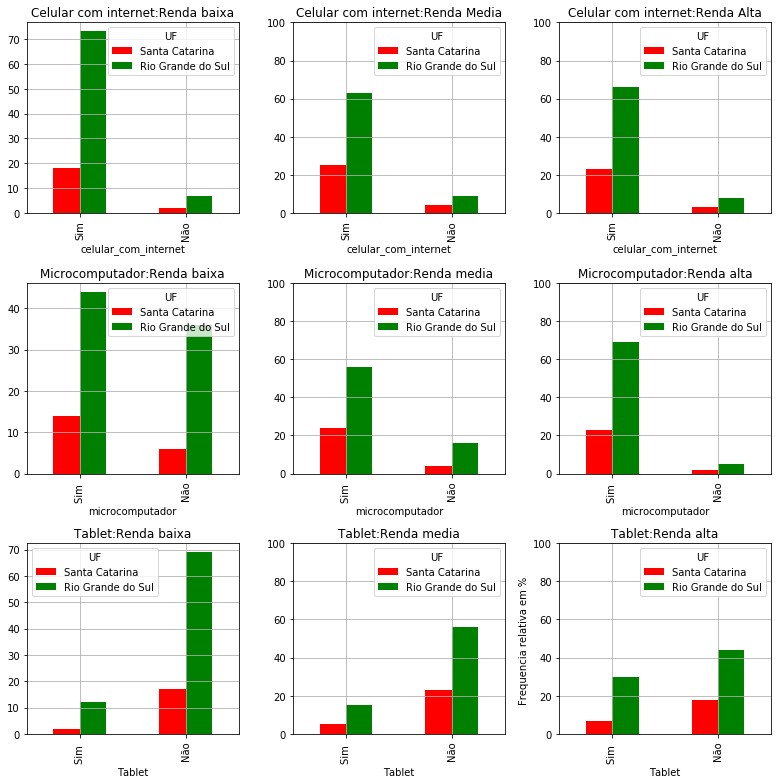

In [56]:
# Crosstab Renda e celular_com_internet
celular_2015 = pd.crosstab(renda_baixa_2015.celular_com_internet,renda_baixa_2015.UF)
celular_2015 = (celular_2015/celular_2015.sum().sum()*100).round(decimals=0)
celular_medio_2015 = pd.crosstab(renda_media_2015.celular_com_internet,renda_media_2015.UF)
celular_medio_2015 = (celular_medio_2015/celular_medio_2015.sum().sum()*100).round(decimals=0)
celular_alto_2015 = pd.crosstab(renda_alta_2015.celular_com_internet,renda_alta_2015.UF)
celular_alto_2015 =(celular_alto_2015/celular_alto_2015.sum().sum()*100).round(decimals=0)

# Crosstab Renda e  Microcomputador 
microcomputador_2015 = pd.crosstab(renda_baixa_2015.microcomputador,renda_baixa_2015.UF)
microcomputador_2015 = (microcomputador_2015/microcomputador_2015.sum().sum()*100).round(decimals=0)
microcomputador_medio_2015 = pd.crosstab(renda_media_2015.microcomputador,renda_media_2015.UF)
microcomputador_medio_2015 = (microcomputador_medio_2015/microcomputador_medio_2015.sum().sum()*100).round(decimals=0)
microcomputador_alto_2015 = pd.crosstab(renda_alta_2015.microcomputador,renda_alta_2015.UF)
microcomputador_alto_2015 = (microcomputador_alto_2015/microcomputador_alto_2015.sum().sum()*100).round(decimals=0)

# Tablet x renda
Tablet_2015 = pd.crosstab(renda_baixa_2015.Tablet,renda_baixa_2015.UF)
Tablet_2015= (Tablet_2015/Tablet_2015.sum().sum()*100).round(decimals=0)
Tablet_medio_2015 = pd.crosstab(renda_media_2015.Tablet,renda_media_2015.UF)
Tablet_medio_2015 = (Tablet_medio_2015/Tablet_medio_2015.sum().sum()*100).round(decimals=0)
Tablet_alto_2015 = pd.crosstab(renda_alta_2015.Tablet,renda_alta_2015.UF)
Tablet_alto_2015 = (Tablet_alto_2015/Tablet_alto_2015.sum().sum()*100).round(decimals=0)


f,axes = plt.subplots(nrows=3,ncols=3)  

# Celular com internet renda baixa media e alta 
celular_2015.plot(kind='bar',ax=axes[0,0],figsize=(10,7),grid=True,color=('red','green')); axes[0,0].set_title("Celular com internet:Renda baixa")
celular_medio_2015.plot(ylim=(0,100),kind="bar",ax=axes[0,1],figsize=(10,7),color=('red','green'),grid=True); axes[0,1].set_title("Celular com internet:Renda Media")
celular_alto_2015.plot(ylim=(0,100),kind="bar",ax=axes[0,2],figsize=(10,7),color=('red','green'),grid=True); axes[0,2].set_title("Celular com internet:Renda Alta")

# Microcomputador plotar grafico
microcomputador_2015.plot(kind='bar',ax=axes[1,0],figsize=(10,8),color=('red','green'),grid=True); axes[1,0].set_title("Microcomputador:Renda baixa")
microcomputador_medio_2015.plot(ylim=(0,100),kind='bar',ax=axes[1,1],color=('red','green'),figsize=(10,8),grid=True); axes[1,1].set_title("Microcomputador:Renda media")
microcomputador_alto_2015.plot(ylim=(0,100),kind='bar',ax=axes[1,2],color=('red','green'),figsize=(10,8),grid=True); axes[1,2].set_title("Microcomputador:Renda alta")

# Tablet plota grafico
Tablet_2015.plot(kind='bar',ax=axes[2,0],figsize=(10,8),color=('red','green'),grid=True); axes[2,0].set_title("Tablet:Renda baixa")
Tablet_medio_2015.plot(ylim=(0,100),kind='bar',ax=axes[2,1],figsize=(10,8),color=('red','green'),grid=True); axes[2,1].set_title("Tablet:Renda media")
Tablet_alto_2015.plot(ylim=(0,100),kind='bar',ax=axes[2,2],figsize=(11,11),color=('red','green'),grid=True); axes[2,2].set_title("Tablet:Renda alta")
plt.ylabel("Frequencia relativa em % ")

plt.tight_layout()

#### Analise dos graficos de 2015 sobre quais aparelhos as pessoas utilizam para acessar a internet
###### Faixa de renda baixa - até 700  reais  ;  Faixa de renda media- de 700 até 2500  reais   ; Faixa de renda alta - maior do que 2500 reais 
###### Nos graficos da faixa de renda baixa desse ano pode se observar que o aparelho mais utilizado para acessar a internet  foi o celular com aproximadamente 90% das pessoas dessa faixa utiliza este aparelho , composto por aproximadamente 71% - RS e 19%-SC .  O microcomputador e o segundo apararelho mais utilizado nessa faixa com mais da metade de 50% das pessoas o utilizando para acessar a  internet. O  tablet é o aparelho que é menos utilizado para  navegar na internet com cerca de 15% das pessoas nessa renda usando esse tipo de aparelho para essa tarefa.
###### A faixa de renda media possui como o aparelho mais usado para essa tarefa o celular  que possui um pouco mais de 80% de usuarios ,apesar disso o segundo a quantidade de pessoas que utilzam  o microcomputador para isto e quase igual ao do celular com apenas alguns porcentos de diferença.
###### Percebe-se que na faixa de renda alta neste ano o aparelho eletronico que se utiliza mais para acessar a internet foi o microcomputador, cerca de 90% o utilizando ,  com uma  diferença cerca de 10% da quantidade de pessoas usam  o celular . O tablet menos de 40% o utilizam para acessar a internet

___
## Conclusão 

Descreva aqui suas conclusões!

###### Podemos concluir que no ano de 2013 o aparelho eletronica mais utilizado para acessar a internet em todas as três faixas de renda foi o microcomputador ,seguido pelo celular e pelo tablet que é o menos utilizado em todas as faixas de renda neste ano. Ja no ano de 2014 ocorreu algumas mudanças no aparelho mais utilizado na faixa de renda baixa em vez de ser o microcomputador o mais utilizado , o celular nessa faixa de renda passou a ser o mais usado e o microcomputador o 2 mais utilizado, tambem podemos observas que nas outras duas categorias que se manteve a ordem a quantidade de pessoas utilizando cada aparelho aumentou.  Ja no ano de 2015 , a ordem de aparelhos de mais utilizados para o  menos utilizado se manteve em relação ao ano de 2014. A faixa de renda media  sofreu mudanças em relação ao ano de 2014 pois  aparelho mais utilizado nessa categoria passou a ser o celular . A faixa de renda alta foi a unica que não possuiu mudança na  ordem dos aparelhos .  Além disso, podemos observar que todos os anos estudados e as variaveis estudadas o aparelho Tablet sempre foi o menos utilizado para esta tarefa nas 3 faixas de renda.

